In [1]:
import torch
model = torch.hub.load('mateuszbuda/brain-segmentation-pytorch', 'unet',
    in_channels=3, out_channels=1, init_features=32, pretrained=True)

Downloading: "https://github.com/mateuszbuda/brain-segmentation-pytorch/archive/master.zip" to /home/loganj/.cache/torch/hub/master.zip
Downloading: "https://github.com/mateuszbuda/brain-segmentation-pytorch/releases/download/v1.0/unet-e012d006.pt" to /home/loganj/.cache/torch/hub/checkpoints/unet-e012d006.pt


In [2]:
import urllib
url, filename = ("https://github.com/mateuszbuda/brain-segmentation-pytorch/raw/master/assets/TCGA_CS_4944.png", "TCGA_CS_4944.png")
try: urllib.URLopener().retrieve(url, filename)
except: urllib.request.urlretrieve(url, filename)

In [3]:
import numpy as np
from PIL import Image
from matplotlib.image import imread
from torchvision import transforms

filename = "TCGA_CS_4944.png"

input_image = imread(filename)
m, s = np.mean(input_image, axis=(0, 1)), np.std(input_image, axis=(0, 1))
preprocess = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=m, std=s),
])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0)

if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model = model.to('cuda')

with torch.no_grad():
    output = model(input_batch)

print(torch.round(output[0]))

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])


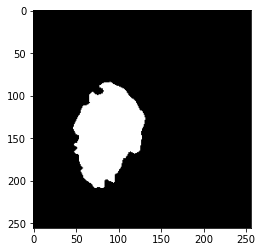

In [15]:
import matplotlib.pyplot as plt

# mask
plt.imshow(torch.round(output[0])[0, :, :], cmap='gray')

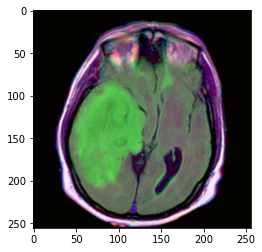

In [6]:
# input image
plt.imshow(input_image)

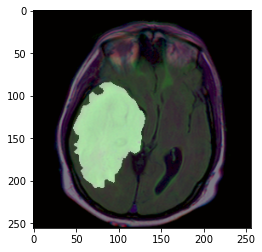

In [14]:
fig, ax = plt.subplots()

plt.imshow(input_image)
plt.imshow(torch.round(output[0])[0, :, :], cmap='gray', alpha=0.5)

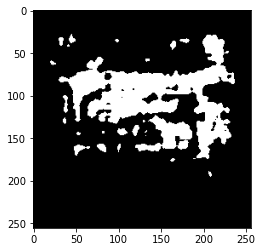

In [29]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

x1 = preprocess(imread("BRAINTUMOR/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_1.tif")).unsqueeze(0)
with torch.no_grad():
    output = model(x1)
    
plt.imshow(torch.round(output[0])[0, :, :], cmap='gray')

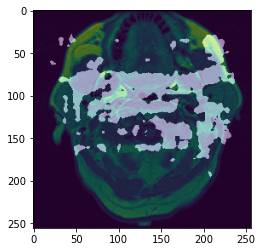

In [32]:
fig, ax = plt.subplots()
plt.imshow(x1[0][0, :, :])

helper = transforms.ToTensor()

plt.imshow(torch.round(output[0])[0, :, :], cmap='gray', alpha=0.5)

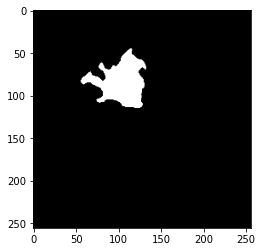

In [51]:
x2 = imread("BRAINTUMOR/kaggle_3m/TCGA_CS_4941_19960909/TCGA_CS_4941_19960909_13.tif")

plt.imshow(x2)

helper = transforms.ToTensor()

x2 = helper(x2).unsqueeze(0)

with torch.no_grad():
    output = model(x2)
    
plt.imshow(output[0][0, :, :], cmap='gray')